In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
comcast_data=pd.read_csv('Comcast_telecom_complaints_data.csv')

In [3]:
comcast_data.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [4]:
comcast_data.shape

(2224, 11)

In [5]:
comcast_data.isnull().sum()

Ticket #                       0
Customer Complaint             0
Date                           0
Date_month_year                0
Time                           0
Received Via                   0
City                           0
State                          0
Zip code                       0
Status                         0
Filing on Behalf of Someone    0
dtype: int64

In [6]:
comcast_data.dtypes

Ticket #                       object
Customer Complaint             object
Date                           object
Date_month_year                object
Time                           object
Received Via                   object
City                           object
State                          object
Zip code                        int64
Status                         object
Filing on Behalf of Someone    object
dtype: object

In [7]:
comcast_data=comcast_data.drop('Date',axis='columns')
comcast_data['Date_month_year']=pd.to_datetime(comcast_data['Date_month_year'])
comcast_data.dtypes

Ticket #                               object
Customer Complaint                     object
Date_month_year                datetime64[ns]
Time                                   object
Received Via                           object
City                                   object
State                                  object
Zip code                                int64
Status                                 object
Filing on Behalf of Someone            object
dtype: object

In [8]:
comcast_data['Month_d']=comcast_data['Date_month_year'].dt.month
comcast_data.head()

,Ticket #,Customer Complaint,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Month_d
0,250635,Comcast Cable Internet Speeds,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,4
1,223441,Payment disappear - service got disconnected,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,8
2,242732,Speed and Service,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,4
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,7
4,307175,Comcast not working and no service to boot,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,5


<AxesSubplot:xlabel='Date_month_year'>

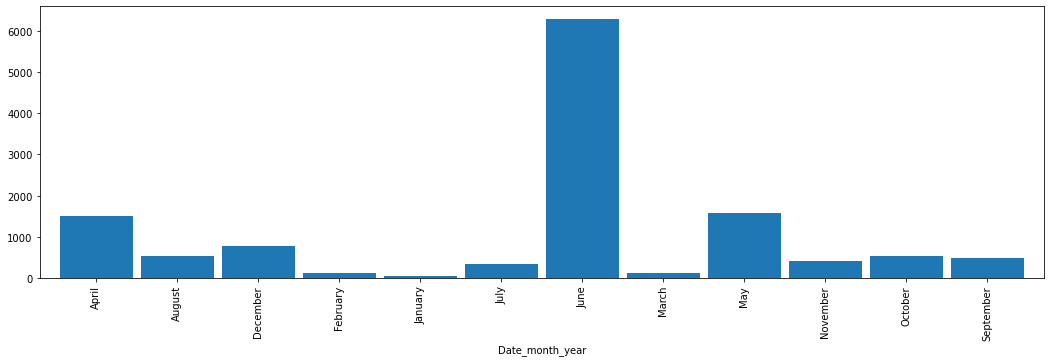

In [9]:
month_data=comcast_data.groupby([comcast_data['Date_month_year'].dt.month_name()], sort=True)
month_data['Month_d'].sum().plot(kind='bar',figsize=(18,5),stacked=True,align='center',width=0.9)

In [10]:
comcast_data['Day_d']=comcast_data['Date_month_year'].dt.day
comcast_data.head()

,Ticket #,Customer Complaint,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Month_d,Day_d
0,250635,Comcast Cable Internet Speeds,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,4,22
1,223441,Payment disappear - service got disconnected,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,8,4
2,242732,Speed and Service,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,4,18
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,7,5
4,307175,Comcast not working and no service to boot,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,5,26


<AxesSubplot:xlabel='Day_d', ylabel='Day_d'>

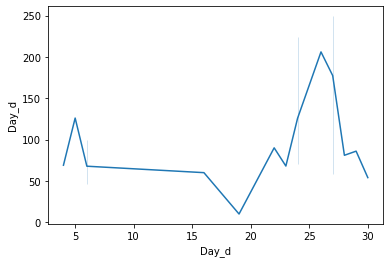

In [11]:
sns.lineplot(x=comcast_data['Day_d'], y=comcast_data['Day_d'].value_counts())

In [12]:
comcast_data['Customer Complaint']=comcast_data['Customer Complaint'].str.title()
comp_freq=comcast_data['Customer Complaint'].value_counts()
comp_freq

Comcast                                                            102
Comcast Data Cap                                                    30
Comcast Internet                                                    29
Comcast Data Caps                                                   21
Comcast Billing                                                     18
                                                                  ... 
Monthly Data Caps                                                    1
Comcast/Xfinity Poor Service, Fraudulent Billing And Collection      1
Lost Emails/Billing                                                  1
Improper Billing And Non Resolution Of Issues                        1
Comcast, Ypsilanti Mi Internet Speed                                 1
Name: Customer Complaint, Length: 1740, dtype: int64

In [13]:
from wordcloud import WordCloud, STOPWORDS
common_complaints = comcast_data['Customer Complaint'].dropna().tolist()
common_complaints =''.join(common_complaints).lower()

list_stops = ('Comcast','Now','Company','Day','Someone','Thing','Also','Got','Way','Call','Called','One','Said','Tell')

for word in list_stops:
    STOPWORDS.add(word)

In [14]:
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', width=1200,height=1000).generate(common_complaints)

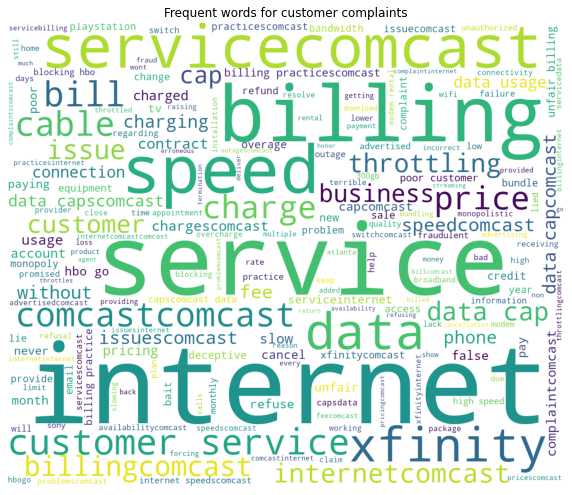

In [15]:
plt.figure( figsize=(10,12) )
plt.imshow(wordcloud)
plt.title('Frequent words for customer complaints')
plt.axis('off')
plt.show()

In [36]:
 comcast_data["Received Via"].value_counts()


Customer Care Call    1119
Internet              1105
Name: Received Via, dtype: int64

In [38]:
comcast_data["Final_Status"]=["Open" if (status == "Open" or status == "Pending") else "Closed" for status in comcast_data["Status"]]  

In [39]:
comcast_data

,Ticket #,Customer Complaint,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Month_d,Day_d,Final_Status
0,250635,Comcast Cable Internet Speeds,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,4,22,Closed
1,223441,Payment Disappear - Service Got Disconnected,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,8,4,Closed
2,242732,Speed And Service,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,4,18,Closed
3,277946,Comcast Imposed A New Usage Cap Of 300Gb That ...,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,7,5,Open
4,307175,Comcast Not Working And No Service To Boot,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,5,26,Closed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2219,213550,Service Availability,2015-02-04,9:13:18 AM,Customer Care Call,Youngstown,Florida,32466,Closed,No,2,4,Closed
2220,318775,Comcast Monthly Billing For Returned Modem,2015-02-06,1:24:39 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No,2,6,Closed
2221,331188,Complaint About Comcast,2015-09-06,5:28:41 PM,Internet,Ypsilanti,Michigan,48197,Solved,No,9,6,Closed
2222,360489,Extremely Unsatisfied Comcast Customer,2015-06-23,11:13:30 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No,6,23,Closed


In [41]:
comcast_data['State'] = comcast_data['State'].str.title() 
st_cmp = comcast_data.groupby(['State','Final_Status']).size().unstack().fillna(0)

In [42]:
st_cmp

Final_Status,Closed,Open
State,,
Alabama,17.0,9.0
Arizona,14.0,6.0
Arkansas,6.0,0.0
California,159.0,61.0
Colorado,58.0,22.0
Connecticut,9.0,3.0
Delaware,8.0,4.0
District Of Columbia,15.0,2.0
Florida,201.0,39.0


<AxesSubplot:ylabel='State'>

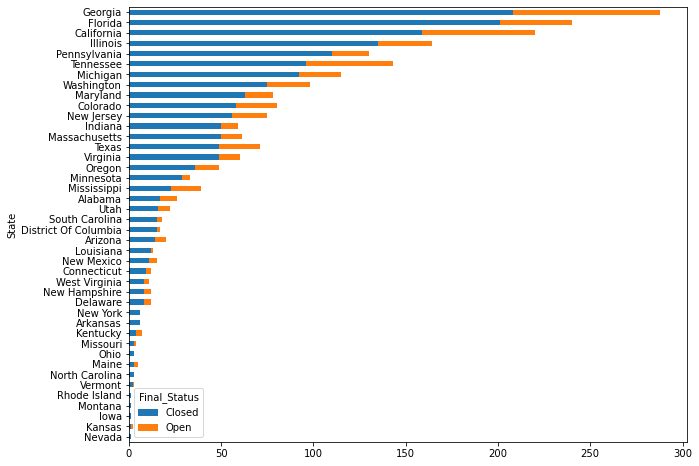

In [43]:
st_cmp.sort_values('Closed',axis = 0,ascending=True).plot(kind="barh", figsize=(10,8), stacked=True)

## as we can see Georgia have highest number of complaints

In [47]:
#highest percentage of unresolved case
st_cmp['Unresolved_pre']=st_cmp['Open']/st_cmp['Open'].sum()*100
st_cmp['Resolved_pre']=st_cmp['Closed']/st_cmp['Closed'].sum()*100

In [48]:
st_cmp

Final_Status,Closed,Open,Unresolved_pre,Resolved_pre
State,,,,
Alabama,17.0,9.0,1.740812,0.995899
Arizona,14.0,6.0,1.160542,0.820152
Arkansas,6.0,0.0,0.000000,0.351494
California,159.0,61.0,11.798839,9.314587
Colorado,58.0,22.0,4.255319,3.397774
Connecticut,9.0,3.0,0.580271,0.527241
Delaware,8.0,4.0,0.773694,0.468658
District Of Columbia,15.0,2.0,0.386847,0.878735
Florida,201.0,39.0,7.543520,11.775044


### Georgia have highest percentage of unresolved cases and resolved cases

In [49]:
cr = comcast_data.groupby(['Received Via','Final_Status']).size().unstack().fillna(0)
cr['resolved'] = cr['Closed']/cr['Closed'].sum()*100
cr['resolved']

Received Via
Customer Care Call    50.615114
Internet              49.384886
Name: resolved, dtype: float64

We can see resolved precentage for customer call is 50% and internet is 49% 
1. June is the month in which most complaints were raised and specially in the last week 
2. Georgia saw highest number of complaints filed. 
3. most of the complaints are related to internet, service and billing.